# Example of Lecture 14, 15 -- ARIMA for time series

Example from: https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

Total samples are: 100


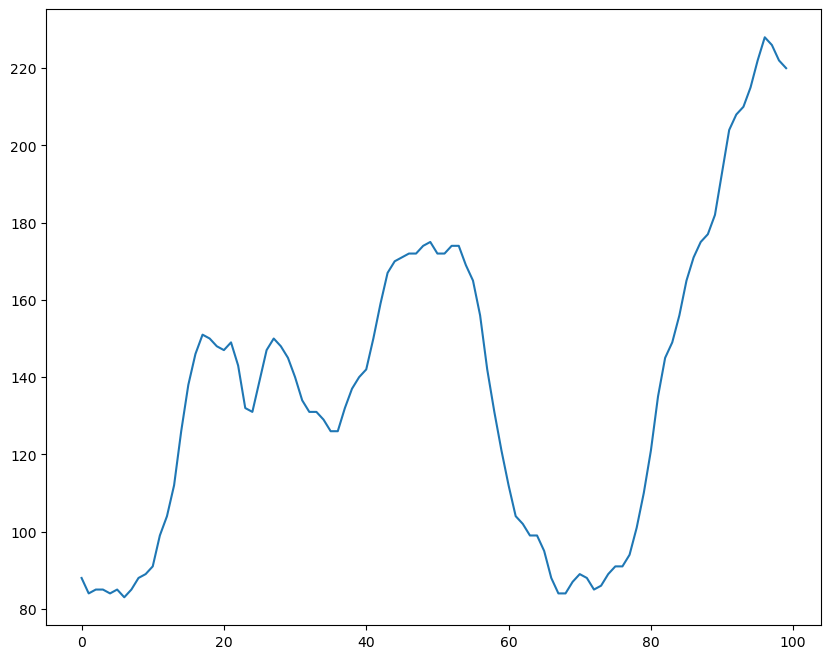

In [41]:
df = pd.read_csv('WWWusage.csv', names = ['index','time','value'], header = 0)
print(f"Total samples are: {len(df)}")

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(df['value'])
plt.show()

## ARIMA(p,d,q)
- p: order of autocorrection
- d: order of differential
- q: order of moving average

**The key to build a ARIMA model is to choose proper p, d, q**

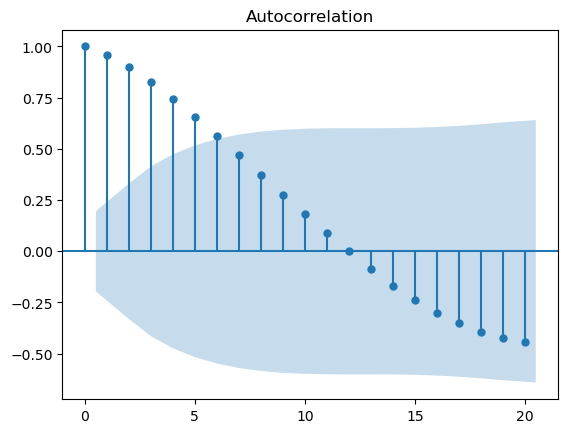

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.value)
plt.show()

Clearly, the data is not ideal for the ARIMA model to directly start autoregressive training. So let’s see how the differencing segment of ARIMA makes the data stationary.



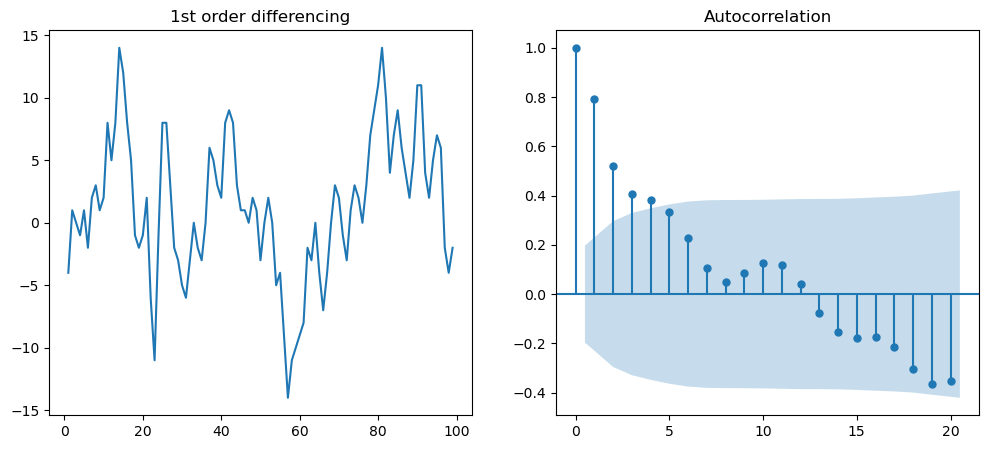

In [54]:
f = plt.figure(figsize = (12, 5))
ax1 = f.add_subplot(121)
ax1.set_title("1st order differencing")
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(),ax=ax2)
plt.show()

As seen above, first-order differencing shakes up autocorrelation considerably. We can also try 2nd order differencing to enhance the stationary nature.

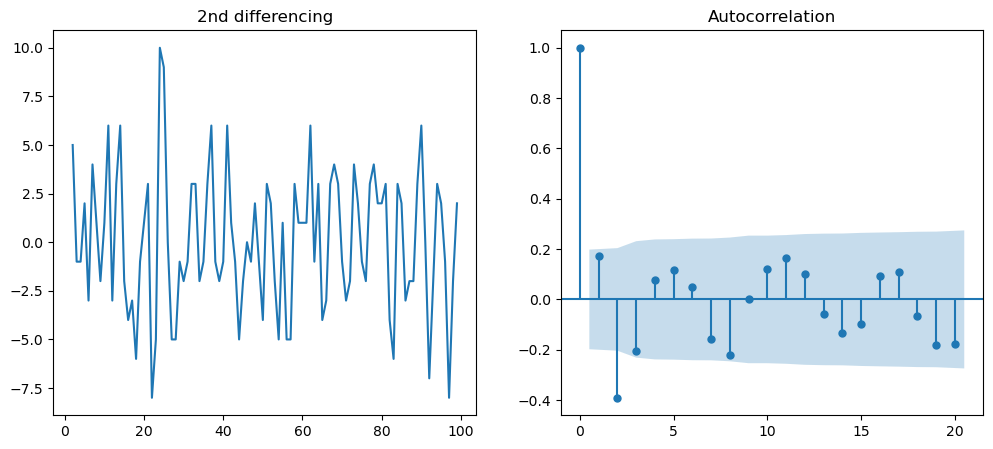

In [56]:
# In the following, we will do for second differencing
f = plt.figure(figsize = (12, 5))
ax1 = f.add_subplot(121)
ax1.set_title('2nd differencing')
ax1.plot(df.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(),ax=ax2)
plt.show()

In [59]:
# Non stationary test by ADF test

from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().dropna())
print('p-value: ', result[1])



p-value:  0.12441935447109487
p-value:  0.07026846015272728
p-value:  2.843428755547158e-17


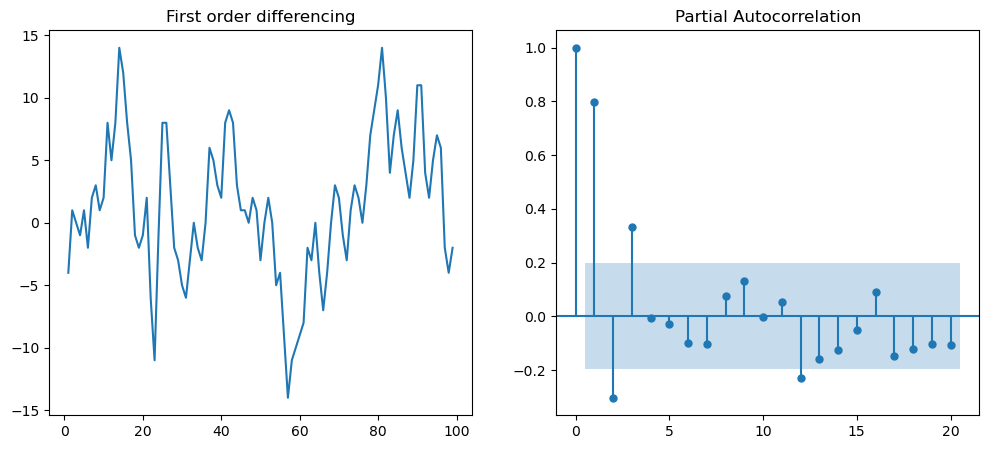

In [63]:
# Next we can determine the value of "p" for first differencing
f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax1.set_title('First order differencing')
ax1.plot(df.value.diff().dropna())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

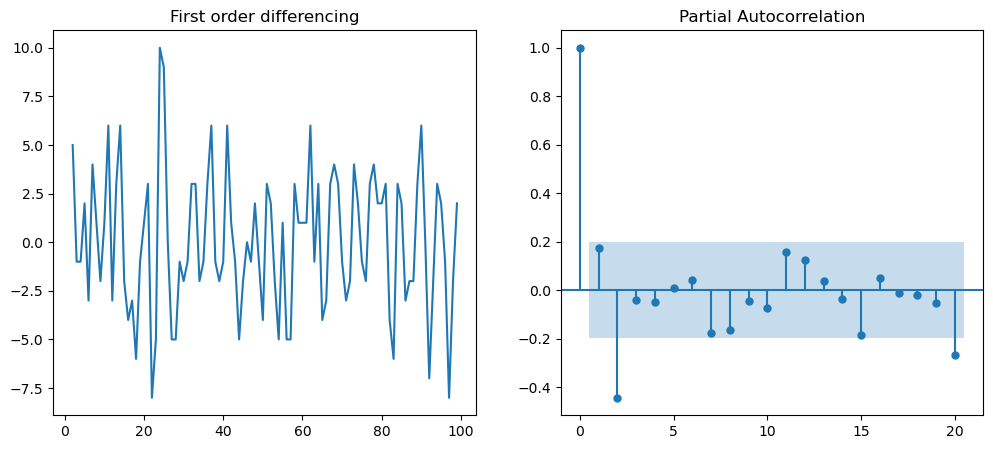

In [64]:
# Next we can determine the value of "p" for second differencing
f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax1.set_title('First order differencing')
ax1.plot(df.value.diff().diff().dropna())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

## ***Thus, final ARIMA model defined as ARIMA(p=1, d=1,q= 2).***

# PART II: Fit the ARIMA model

In [66]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.value, order = (1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Fri, 20 Jan 2023   AIC                            516.253
Time:                        18:47:18   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

In [67]:
# test another setting of (p, d,q)

arima_model = ARIMA(df.value, order = (1,2,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -252.594
Date:                Fri, 20 Jan 2023   AIC                            513.189
Time:                        18:48:28   BIC                            523.529
Sample:                             0   HQIC                           517.371
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6530      0.103      6.359      0.000       0.452       0.854
ma.L1         -0.4743      2.191     -0.217      0.829      -4.768       3.819
ma.L2         -0.5251      1.130     -0.465      0.6

In [68]:
model.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

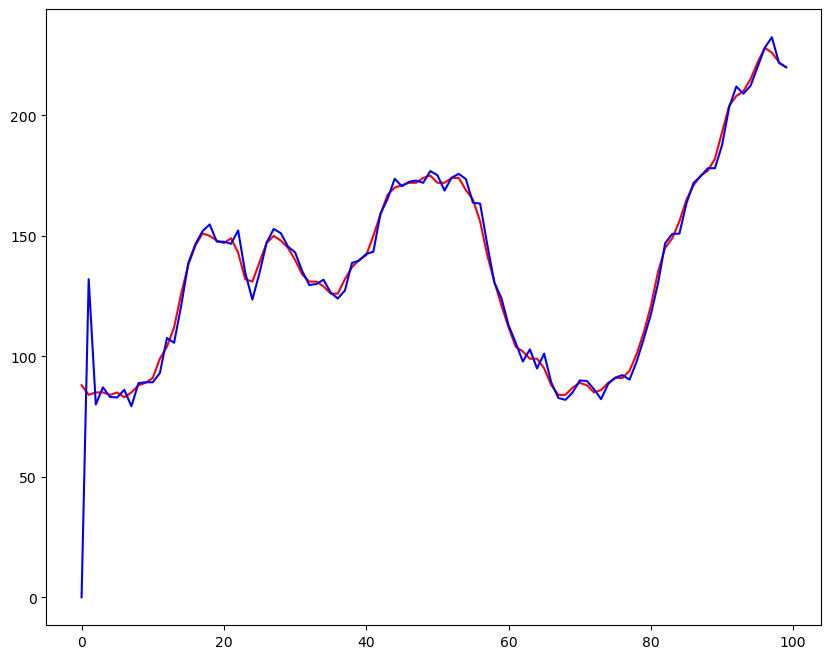

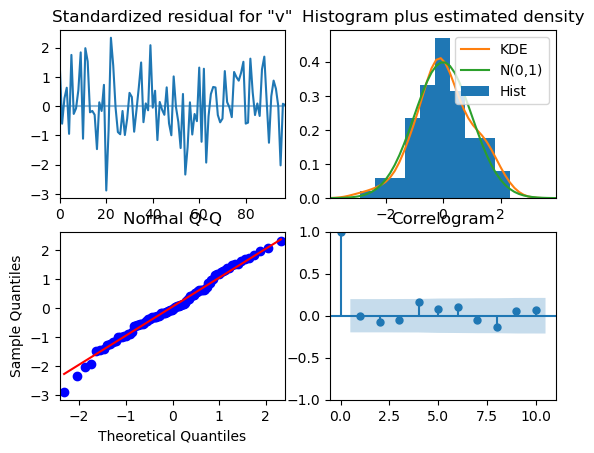

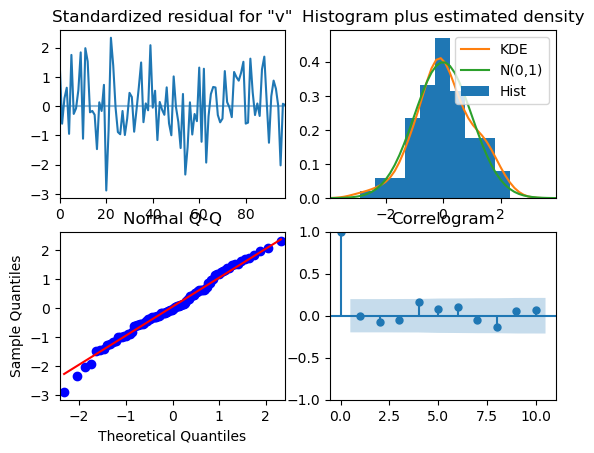

In [82]:
plt.figure(figsize = (10,8))
plt.plot(df.value, color = 'r')
plt.plot(model.predict(),color = 'b')
plt.show()

model.plot_diagnostics()
